<a href="https://colab.research.google.com/github/AUBAI-ALKHABBAZ/AUBAI-ALKHABBAZ/blob/main/Green_Red_apples_obey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/fruits_classification.zip", 'r')
zip_ref.extractall()
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
%pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="POaDTNEC0zhZzHZ82xW7")
project = rf.workspace("apples-1lrlt").project("red-and-green-apples-single-classification")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Red-and-Green-Apples-Single-Classification-1 in folder:: 100%|██████████| 613/613 [00:00<00:00, 1248.40it/s]


In [4]:
import os

base_dir = '/content/Red-and-Green-Apples-Single-Classification-1'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['valid', 'train', 'README.roboflow.txt', 'test', 'README.dataset.txt']

Contents of train directory:
['red', 'green']

Contents of validation directory:
['red', 'green']


In [5]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training red/green pictures
train_green_dir = os.path.join(train_dir, 'green')
train_red_dir = os.path.join(train_dir, 'red')

# Directory with validation red/green  pictures
validation_green_dir = os.path.join(validation_dir, 'green')
validation_red_dir = os.path.join(validation_dir, 'red')

In [6]:
train_green_fnames = os.listdir( train_green_dir )
train_red_fnames = os.listdir( train_red_dir )

print(train_green_fnames[:10])
print(train_red_fnames[:10])

['20221214_120936_039_jpg.rf.73aaf564c127ef08a90a2ae6f5b7fa4c.jpg', '20221214_121841_018_jpg.rf.802ad3493f7a25655d6422d3f3d3f5b6.jpg', '20221214_121921_016_jpg.rf.b6be2cd3f2681a1c22b2ebd7b0ede76e.jpg', '20221214_121921_030_jpg.rf.796a374224f057685fe30c6f1b4e04f7.jpg', '20221214_120936_060_jpg.rf.b062d1c33814525dca344300380fda7d.jpg', '20221214_120936_044_jpg.rf.827c91a611d084020d1a07a3f1a27bad.jpg', '20221214_121841_065_jpg.rf.4a2db2afe1fe48eac255523d3444607e.jpg', '20221214_120936_012_jpg.rf.e892bc46b4060f59b021ff9c5659b180.jpg', '20221214_121921_028_jpg.rf.29d85366466a5f59bc468ef99b3c69f4.jpg', '20221214_121031_038_jpg.rf.0abad641d098d2761081d95e2bd3243f.jpg']
['20221214_121248_039_jpg.rf.a0c87e2b359f85856830ed572f8a02a2.jpg', '20221214_121406_030_jpg.rf.2c418d3d3b25cbf77d42309d40a1a5b5.jpg', '20221214_121424_052_jpg.rf.2af134078a83872558b24bb95e4a90bc.jpg', '20221214_121406_032_jpg.rf.ec5874e5019a0f0cf11b184193335ddf.jpg', 'a02_jpg.rf.f85bad1f2cc0a3ea81a7f58327757190.jpg', '20221214

In [7]:
print('total training green Apples images :', len(os.listdir(      train_green_dir) ))
print('total training red Apples images :', len(os.listdir(      train_red_dir ) ))

print('total validation green Apples images :', len(os.listdir( validation_green_dir ) ))
print('total validation red Apples images :', len(os.listdir( validation_red_dir ) ))

total training green Apples images : 208
total training red Apples images : 212
total validation green Apples images : 62
total validation red Apples images : 61


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

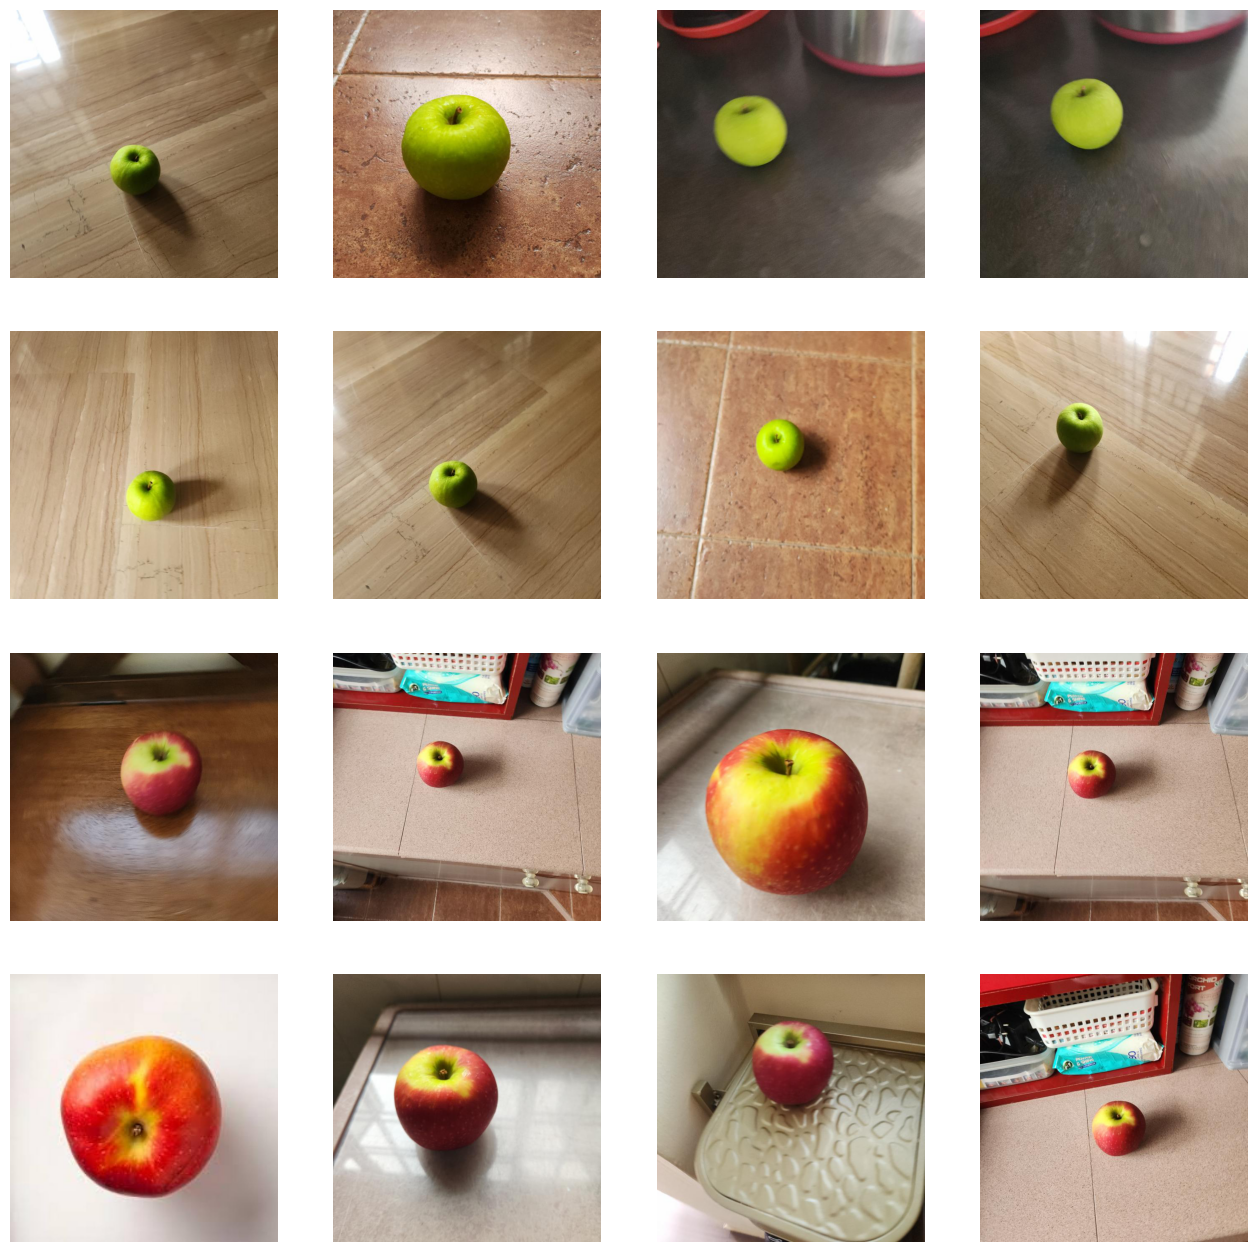

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_green_pix = [os.path.join(train_green_dir, fname) 
                for fname in train_green_fnames[ pic_index-8:pic_index] 
               ]

next_red_pix = [os.path.join(train_red_dir, fname) 
                for fname in train_red_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_green_pix+next_red_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [13]:
# DEFINE A KERAS MODEL TO CLASSIFY Red apples V Green apples
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [15]:
TRAINING_DIR = '/content/Red-and-Green-Apples-Single-Classification-1/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         batch_size=100,
                                                         class_mode='binary', 
                                                         target_size=(150,150))
VALIDATION_DIR = '/content/Red-and-Green-Apples-Single-Classification-1/valid'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=100,
                                                         class_mode='binary', 
                                                         target_size=(150,150))

Found 420 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [16]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)


`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
5/5 [==============================] - 18s 3s/step - loss: 1.6738 - acc: 0.4857 - val_loss: 0.6876 - val_acc: 0.4959
Epoch 2/50
5/5 [==============================] - 16s 3s/step - loss: 0.6915 - acc: 0.4667 - val_loss: 0.6716 - val_acc: 0.7805
Epoch 3/50
5/5 [==============================] - 22s 4s/step - loss: 0.6610 - acc: 0.6595 - val_loss: 0.6486 - val_acc: 0.5610
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 0.6518 - acc: 0.6571 - val_loss: 0.6151 - val_acc: 0.8374
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 0.5392 - acc: 0.8452 - val_loss: 0.9587 - val_acc: 0.4959
Epoch 6/50
5/5 [==============================] - 16s 3s/step - loss: 0.6717 - acc: 0.7762 - val_loss: 0.4910 - val_acc: 0.8943
Epoch 7/50
5/5 [==============================] - 15s 3s/step - loss: 0.4350 - acc: 0.8619 - val_loss: 0.3596 - val_acc: 0.8943
Epoch 8/50
5/5 [==============================] - 16s 3s/step - loss: 0.4782 - acc: 0.8429 - val_loss: 1

[0.6884546875953674, 0.726661205291748, 0.7396119236946106, 0.7041252255439758, 0.6892977356910706, 0.6317124366760254, 0.706475019454956, 0.6573536396026611, 0.6192429661750793, 0.6244511008262634, 0.623338520526886, 0.5874892473220825, 0.631537139415741, 0.543531596660614, 0.6669571399688721, 0.5391646027565002, 0.548102080821991, 0.5574190020561218, 0.8890625238418579, 0.5344428420066833, 0.6151617765426636, 0.49927130341529846, 0.6136860251426697, 0.44285064935684204, 0.9193681478500366, 0.4707706868648529, 0.4023490250110626, 1.0259469747543335, 0.42333874106407166, 0.5405275225639343, 0.45376068353652954, 0.7335509061813354, 0.45464831590652466, 0.5829112529754639, 0.4001341760158539, 0.4214675724506378, 0.3391035199165344, 0.34409546852111816, 0.6359879374504089, 0.5477101802825928, 0.3122025728225708, 0.8513725996017456, 0.4057365655899048, 0.6250457763671875, 0.6256443858146667, 0.3017847239971161, 0.37224116921424866, 0.7007982730865479, 0.5018283724784851, 0.3131553828716278

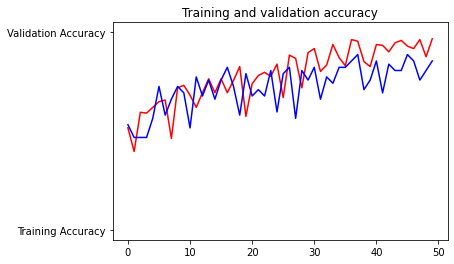

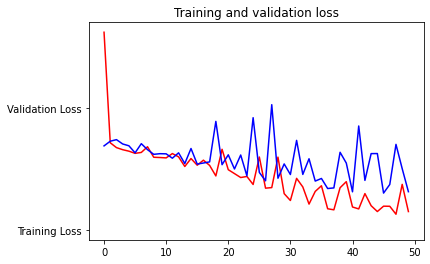

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
print(val_loss)
# Desired output. Charts with training and validation metrics. No crash :)


<Figure size 640x480 with 0 Axes>

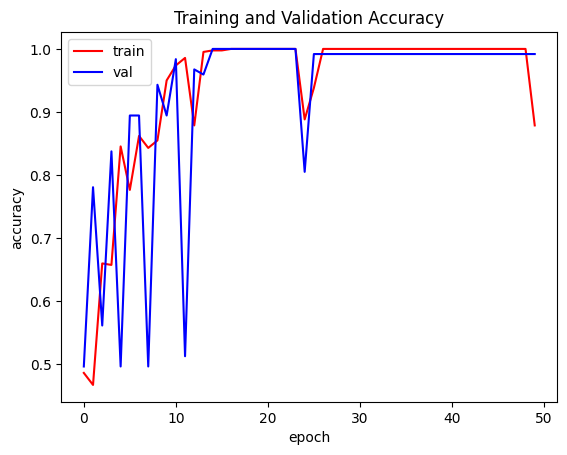

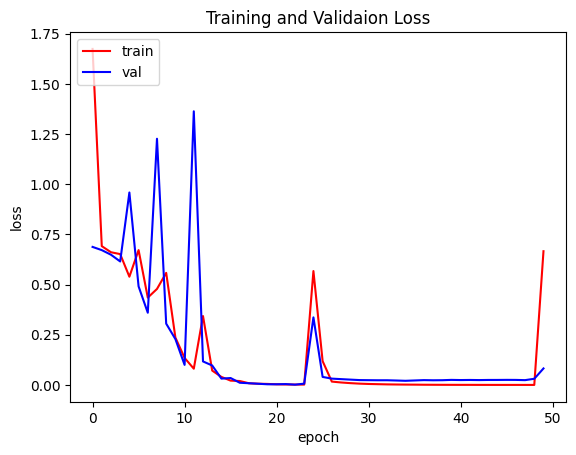

<Figure size 640x480 with 0 Axes>

In [17]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [23]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a red")
  else:
    print(fn + " is a green")

Saving apple_test.jpeg to apple_test.jpeg
1/1 [==============================] - 0s 34ms/step
[0.9997253]
apple_test.jpeg is a red


In [26]:
model.save("red_vs_green_apples.h5")

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(VALIDATION_DIR,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 123 images belonging to 2 classes.
123/123 [==============================] - 3s 22ms/step - loss: 0.0822 - acc: 0.9919
accuracy test:  0.9918699264526367
loss test:  0.0821574330329895


In [ ]:
from google.colab import drive
drive.mount('/content/drive')